In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.subplots_adjust(wspace=0)

same_root = "~/dev/RxCovea/COVID-19_Simulation/Results/61days/Aggregates/" # the core root part of each path

novax = same_root + "NoVax/" # path to no vaccination

standard_path = same_root + "StandardVax/"# path to the standard vaccination

agevax_path = same_root + "AgeVax/"# path to the age vaccination path

movement_path = same_root + "MovementVax/"# path to the movement vaccination strategy

spreading_path = same_root + "SpreadingVax/"# path to the spreading radius strategy

<Figure size 432x288 with 0 Axes>

In [96]:
def getCSV(var : str):
    # var is the compartment that should be analyzed
    nv = pd.read_csv(novax+var+str(".csv")) # novax csv as dataframe
    sv = pd.read_csv(standard_path+var+str(".csv")) # standardvax csv as dataframe
    av = pd.read_csv(agevax_path+var+str(".csv")) # agevax csv as dataframe
    mv = pd.read_csv(movement_path+var+str(".csv")) # movementvax csv as dataframe
    spv = pd.read_csv(spreading_path+var+str(".csv")) # spreadingvax csv as dataframe
    return nv, sv, av, mv, spv
 

In [97]:
def plotFigs(df: pd.DataFrame, pltObj, color:str, label, strat_label: str):
    pltObj.plot(df['Days'], df['mean'], color, linewidth=1)
    pltObj.title.set_text(strat_label)
    pltObj.fill_between(df['Days'], df['LowerBound'], df['UpperBound'], alpha=0.2)
    #pltObj.set_xlabel("Days")
    #pltObj.set_ylabel("ICU")

In [98]:
df1, df2, df3, df4, df5 = getCSV("ICU")

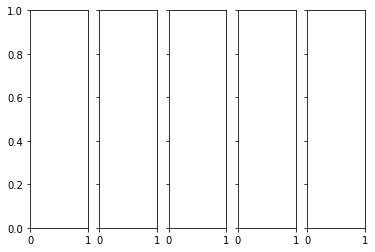

In [99]:
fig2, (ax1, ax2, ax3,ax4, ax5) = plt.subplots(1,5, sharex='all', sharey='all')

In [100]:
def setLabels(cols, rows, label: str):
    for ax in cols:
        ax.set_xlabel("Days")
    for ax in rows:
        ax.set_ylabel(label)


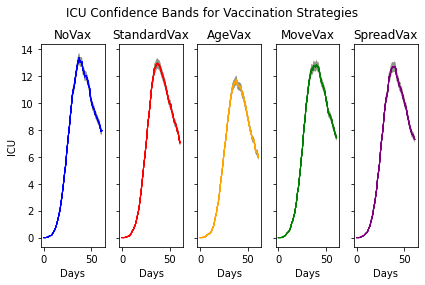

In [113]:
colors = ['blue', 'red', 'orange', 'green', 'purple']
vax_strats = ['NoVax', 'StandardVax', 'AgeVax', 'MoveVax', 'SpreadVax']
axes = [ax1, ax2, ax3, ax4, ax5]
for i, df in enumerate([df1, df2, df3, df4, df5]):
    plotFigs(df, axes[i], colors[i], 'ICU', vax_strats[i])
setLabels([ax1, ax2, ax3, ax4, ax5, ax6], [ax1], "ICU")
#fig2.tight_layout()
fig2.subplots_adjust(top=0.85)
fig2.suptitle("ICU Confidence Bands for Vaccination Strategies")
fig2

In [114]:

fig2.savefig("../Figs/newICU.png", dpi=1200)

Getting figures for the deaths

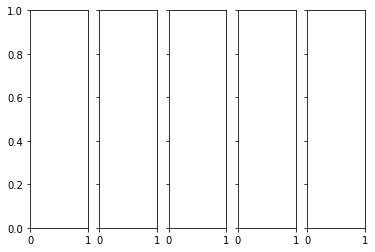

In [115]:
fig_death, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,sharex='all', sharey='all')

In [116]:
d1, d2, d3, d4, d5 = getCSV('D') # get the Death data and put it in dataframes

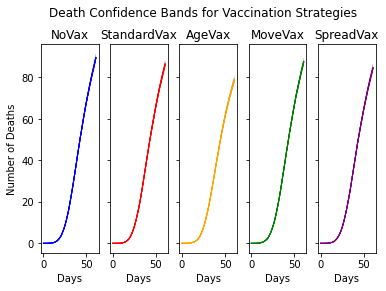

In [121]:
axes = [ax1, ax2, ax3, ax4, ax5]
for i, df in enumerate([d1, d2, d3, d4, d5]):
    plotFigs(df, axes[i], colors[i], 'D', vax_strats[i])
setLabels([ax1, ax2, ax3, ax4, ax5, ax6], [ax1], "Number of Deaths")
#fig2.tight_layout()
fig_death.subplots_adjust(top=0.85)
fig_death.suptitle("Death Confidence Bands for Vaccination Strategies")
fig_death

In [122]:
fig_death.savefig("../Figs/Death_fig.png", dpi=1200)

Find the max number of hospitalizations and the day it peaked

In [123]:
df1, df2, df3, df4, df5 = getCSV("ICU") # get ICU dataframes

In [124]:
peak_and_day = []
data_on_ICU = [df1, df2, df3, df4, df5]

In [126]:
def findMaxAndArg(df):
    vals = df['mean'].to_numpy() # convert the column of means per day to a numpy array
    day = -1 # day of peak
    peak = -1 # the peak number of hospitalizations
    for i, val in enumerate(vals):
        if val > peak:
            day = i
            peak = val
    return (peak,day)
    

In [127]:
for df in data_on_ICU:
    tup = findMaxAndArg(df)
    peak_and_day.append(tup)


In [128]:
for pair in peak_and_day:
    print(pair)


(13.328947368421051, 37)
(12.927631578947368, 37)
(11.713815789473683, 38)
(12.8125, 40)
(12.69078947368421, 40)
